In [1]:
# Importing Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Loading Dataset
df = pd.read_csv('database/dataset.csv')
df = df.drop(['Contour Id','Point Polygon Test'], axis = 1)
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

def accuracy(c, gam):
    from sklearn.svm import SVC
    model = SVC(C = c, gamma = gam, kernel = 'rbf')
    model.fit(X,y)

    from sklearn.model_selection import cross_val_score
    accuracies = cross_val_score(estimator = model,X = X,y = y, cv = 10)
    return accuracies.mean()

df = pd.DataFrame(columns = ['C', 'gamma', 'Accuracy'])
param_grid = {'C' : [0.1, 1, 10, 100, 1000], 'gamma' : [1, 0.1, 0.01, 0.001, 0.0001]}
for i in range(len(param_grid['C'])):
    df.loc[len(df)] = [param_grid['C'][i], param_grid['gamma'][i], accuracy(param_grid['C'][i], param_grid['gamma'][i])]
df.to_csv('database/svm_accuracy.csv', index = False)
print(df)

        C   gamma  Accuracy
0     0.1  1.0000     0.719
1     1.0  0.1000     0.764
2    10.0  0.0100     0.884
3   100.0  0.0010     0.909
4  1000.0  0.0001     0.938


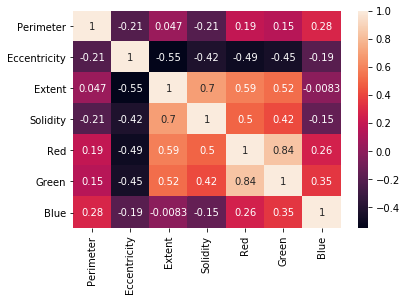

In [8]:
df = pd.read_csv('database/dataset.csv')
df = df.drop(['Contour Id','Point Polygon Test'], axis = 1)
sns.heatmap(df.corr(), annot = True)

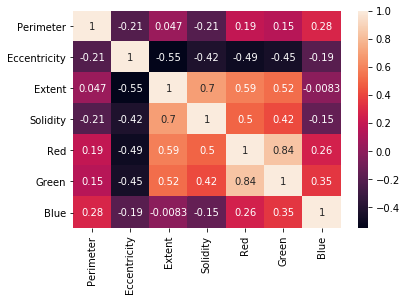

In [7]:
sns.heatmap(df.corr(), annot = True)

In [8]:
# Importing Libraries
import pandas as pd

# Loading Dataset
df = pd.read_csv('database/dataset.csv')
df = df.drop('Contour Id', axis = 1)
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

# Splitting the dataset into the Training set and Test set
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)


from sklearn.svm import SVC
# model = SVC(C = 1000, gamma = 0.0001, kernel = 'rbf')
# model.fit(X_train,y_train)
# y_pred = model.predict(X_test)

# Grid Search
from sklearn.model_selection import GridSearchCV
param_grid = {'C' : [0.1, 1, 10, 100, 1000], 'gamma' : [1, 0.1, 0.01, 0.001, 0.0001]}
grid = GridSearchCV(SVC(), param_grid, verbose = 3)
grid.fit(X, y)

# # k-fold  validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = grid,X = X,y = y, cv = 10)
print(accuracies.mean())


Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.535, total=   0.1s
[CV] C=0.1, gamma=1 ..................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] ...................... C=0.1, gamma=1, score=0.535, total=   0.1s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.535, total=   0.1s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.529, total=   0.1s
[CV] C=0.1, gamma=1 ..................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s


[CV] ...................... C=0.1, gamma=1, score=0.532, total=   0.1s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.535, total=   0.1s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.535, total=   0.1s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.535, total=   0.1s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.529, total=   0.1s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.532, total=   0.1s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ................... C=0.1, gamma=0.01, score=0.814, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] .

[CV] .................... C=10, gamma=0.01, score=0.895, total=   0.1s
[CV] C=10, gamma=0.01 ................................................
[CV] .................... C=10, gamma=0.01, score=0.906, total=   0.1s
[CV] C=10, gamma=0.001 ...............................................
[CV] ................... C=10, gamma=0.001, score=0.942, total=   0.0s
[CV] C=10, gamma=0.001 ...............................................
[CV] ................... C=10, gamma=0.001, score=0.901, total=   0.0s
[CV] C=10, gamma=0.001 ...............................................
[CV] ................... C=10, gamma=0.001, score=0.919, total=   0.0s
[CV] C=10, gamma=0.001 ...............................................
[CV] ................... C=10, gamma=0.001, score=0.884, total=   0.0s
[CV] C=10, gamma=0.001 ...............................................
[CV] ................... C=10, gamma=0.001, score=0.912, total=   0.0s
[CV] C=10, gamma=0.0001 ..............................................
[CV] .

[CV] ................ C=1000, gamma=0.0001, score=0.930, total=   0.1s
[CV] C=1000, gamma=0.0001 ............................................
[CV] ................ C=1000, gamma=0.0001, score=0.965, total=   0.1s
Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1 ..................................................


[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    7.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] ...................... C=0.1, gamma=1, score=0.529, total=   0.1s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.535, total=   0.1s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.535, total=   0.1s
[CV] C=0.1, gamma=1 ..................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


[CV] ...................... C=0.1, gamma=1, score=0.532, total=   0.1s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.532, total=   0.1s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.529, total=   0.1s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.535, total=   0.1s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.535, total=   0.1s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.532, total=   0.1s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.532, total=   0.1s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] .

[CV] .................... C=10, gamma=0.01, score=0.922, total=   0.0s
[CV] C=10, gamma=0.001 ...............................................
[CV] ................... C=10, gamma=0.001, score=0.935, total=   0.0s
[CV] C=10, gamma=0.001 ...............................................
[CV] ................... C=10, gamma=0.001, score=0.910, total=   0.0s
[CV] C=10, gamma=0.001 ...............................................
[CV] ................... C=10, gamma=0.001, score=0.897, total=   0.0s
[CV] C=10, gamma=0.001 ...............................................
[CV] ................... C=10, gamma=0.001, score=0.896, total=   0.0s
[CV] C=10, gamma=0.001 ...............................................
[CV] ................... C=10, gamma=0.001, score=0.922, total=   0.0s
[CV] C=10, gamma=0.0001 ..............................................
[CV] .................. C=10, gamma=0.0001, score=0.981, total=   0.0s
[CV] C=10, gamma=0.0001 ..............................................
[CV] .

[CV] ................ C=1000, gamma=0.0001, score=0.961, total=   0.1s
Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.535, total=   0.1s
[CV] C=0.1, gamma=1 ..................................................


[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    6.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] ...................... C=0.1, gamma=1, score=0.535, total=   0.1s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.529, total=   0.1s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.532, total=   0.1s
[CV] C=0.1, gamma=1 ..................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


[CV] ...................... C=0.1, gamma=1, score=0.532, total=   0.1s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.535, total=   0.1s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.535, total=   0.1s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.529, total=   0.1s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.532, total=   0.1s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.532, total=   0.1s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ................... C=0.1, gamma=0.01, score=0.735, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] .

[CV] .................... C=10, gamma=0.01, score=0.903, total=   0.0s
[CV] C=10, gamma=0.01 ................................................
[CV] .................... C=10, gamma=0.01, score=0.903, total=   0.0s
[CV] C=10, gamma=0.01 ................................................
[CV] .................... C=10, gamma=0.01, score=0.903, total=   0.0s
[CV] C=10, gamma=0.001 ...............................................
[CV] ................... C=10, gamma=0.001, score=0.935, total=   0.0s
[CV] C=10, gamma=0.001 ...............................................
[CV] ................... C=10, gamma=0.001, score=0.890, total=   0.0s
[CV] C=10, gamma=0.001 ...............................................
[CV] ................... C=10, gamma=0.001, score=0.910, total=   0.0s
[CV] C=10, gamma=0.001 ...............................................
[CV] ................... C=10, gamma=0.001, score=0.896, total=   0.0s
[CV] C=10, gamma=0.001 ...............................................
[CV] .

[CV] ................ C=1000, gamma=0.0001, score=0.929, total=   0.0s
[CV] C=1000, gamma=0.0001 ............................................
[CV] ................ C=1000, gamma=0.0001, score=0.948, total=   0.1s
[CV] C=1000, gamma=0.0001 ............................................
[CV] ................ C=1000, gamma=0.0001, score=0.935, total=   0.1s
[CV] C=1000, gamma=0.0001 ............................................
[CV] ................ C=1000, gamma=0.0001, score=0.968, total=   0.1s


[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    6.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.535, total=   0.1s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.535, total=   0.1s
[CV] C=0.1, gamma=1 ..................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


[CV] ...................... C=0.1, gamma=1, score=0.529, total=   0.1s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.532, total=   0.1s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.532, total=   0.1s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.535, total=   0.1s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.535, total=   0.1s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.529, total=   0.1s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.532, total=   0.1s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .

[CV] .................... C=10, gamma=0.01, score=0.903, total=   0.1s
[CV] C=10, gamma=0.01 ................................................
[CV] .................... C=10, gamma=0.01, score=0.903, total=   0.0s
[CV] C=10, gamma=0.01 ................................................
[CV] .................... C=10, gamma=0.01, score=0.897, total=   0.0s
[CV] C=10, gamma=0.01 ................................................
[CV] .................... C=10, gamma=0.01, score=0.903, total=   0.0s
[CV] C=10, gamma=0.01 ................................................
[CV] .................... C=10, gamma=0.01, score=0.903, total=   0.0s
[CV] C=10, gamma=0.001 ...............................................
[CV] ................... C=10, gamma=0.001, score=0.929, total=   0.0s
[CV] C=10, gamma=0.001 ...............................................
[CV] ................... C=10, gamma=0.001, score=0.929, total=   0.0s
[CV] C=10, gamma=0.001 ...............................................
[CV] .

[CV] ................ C=1000, gamma=0.0001, score=0.981, total=   0.1s
[CV] C=1000, gamma=0.0001 ............................................
[CV] ................ C=1000, gamma=0.0001, score=0.935, total=   0.0s
[CV] C=1000, gamma=0.0001 ............................................
[CV] ................ C=1000, gamma=0.0001, score=0.961, total=   0.1s
[CV] C=1000, gamma=0.0001 ............................................
[CV] ................ C=1000, gamma=0.0001, score=0.922, total=   0.0s
[CV] C=1000, gamma=0.0001 ............................................
[CV] ................ C=1000, gamma=0.0001, score=0.942, total=   0.1s
Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.535, total=   0.1s
[CV] C=0.1, gamma=1 ..................................................


[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    6.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] ...................... C=0.1, gamma=1, score=0.535, total=   0.1s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.529, total=   0.1s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.532, total=   0.1s
[CV] C=0.1, gamma=1 ..................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


[CV] ...................... C=0.1, gamma=1, score=0.532, total=   0.1s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.535, total=   0.1s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.535, total=   0.1s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.529, total=   0.1s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.532, total=   0.1s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.532, total=   0.1s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ................... C=0.1, gamma=0.01, score=0.755, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] .

[CV] ................... C=10, gamma=0.001, score=0.909, total=   0.0s
[CV] C=10, gamma=0.001 ...............................................
[CV] ................... C=10, gamma=0.001, score=0.890, total=   0.0s
[CV] C=10, gamma=0.0001 ..............................................
[CV] .................. C=10, gamma=0.0001, score=0.929, total=   0.0s
[CV] C=10, gamma=0.0001 ..............................................
[CV] .................. C=10, gamma=0.0001, score=0.968, total=   0.0s
[CV] C=10, gamma=0.0001 ..............................................
[CV] .................. C=10, gamma=0.0001, score=0.910, total=   0.0s
[CV] C=10, gamma=0.0001 ..............................................
[CV] .................. C=10, gamma=0.0001, score=0.909, total=   0.0s
[CV] C=10, gamma=0.0001 ..............................................
[CV] .................. C=10, gamma=0.0001, score=0.922, total=   0.0s
[CV] C=100, gamma=1 ..................................................
[CV] .

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    6.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] ...................... C=0.1, gamma=1, score=0.535, total=   0.1s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.529, total=   0.1s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.532, total=   0.1s
[CV] C=0.1, gamma=1 ..................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


[CV] ...................... C=0.1, gamma=1, score=0.532, total=   0.1s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.535, total=   0.1s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.535, total=   0.1s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.529, total=   0.1s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.532, total=   0.1s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.532, total=   0.1s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ................... C=0.1, gamma=0.01, score=0.716, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] .

[CV] .................... C=10, gamma=0.01, score=0.916, total=   0.0s
[CV] C=10, gamma=0.001 ...............................................
[CV] ................... C=10, gamma=0.001, score=0.910, total=   0.0s
[CV] C=10, gamma=0.001 ...............................................
[CV] ................... C=10, gamma=0.001, score=0.935, total=   0.0s
[CV] C=10, gamma=0.001 ...............................................
[CV] ................... C=10, gamma=0.001, score=0.871, total=   0.0s
[CV] C=10, gamma=0.001 ...............................................
[CV] ................... C=10, gamma=0.001, score=0.877, total=   0.0s
[CV] C=10, gamma=0.001 ...............................................
[CV] ................... C=10, gamma=0.001, score=0.903, total=   0.0s
[CV] C=10, gamma=0.0001 ..............................................
[CV] .................. C=10, gamma=0.0001, score=0.935, total=   0.0s
[CV] C=10, gamma=0.0001 ..............................................
[CV] .

[CV] ................ C=1000, gamma=0.0001, score=0.961, total=   0.1s
Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.535, total=   0.1s
[CV] C=0.1, gamma=1 ..................................................


[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    6.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] ...................... C=0.1, gamma=1, score=0.535, total=   0.1s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.529, total=   0.1s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.532, total=   0.1s
[CV] C=0.1, gamma=1 ..................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


[CV] ...................... C=0.1, gamma=1, score=0.532, total=   0.1s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.535, total=   0.1s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.535, total=   0.1s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.529, total=   0.1s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.532, total=   0.1s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.532, total=   0.1s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ................... C=0.1, gamma=0.01, score=0.729, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] .

[CV] .................... C=10, gamma=0.01, score=0.909, total=   0.0s
[CV] C=10, gamma=0.001 ...............................................
[CV] ................... C=10, gamma=0.001, score=0.903, total=   0.0s
[CV] C=10, gamma=0.001 ...............................................
[CV] ................... C=10, gamma=0.001, score=0.942, total=   0.0s
[CV] C=10, gamma=0.001 ...............................................
[CV] ................... C=10, gamma=0.001, score=0.890, total=   0.0s
[CV] C=10, gamma=0.001 ...............................................
[CV] ................... C=10, gamma=0.001, score=0.890, total=   0.0s
[CV] C=10, gamma=0.001 ...............................................
[CV] ................... C=10, gamma=0.001, score=0.916, total=   0.0s
[CV] C=10, gamma=0.0001 ..............................................
[CV] .................. C=10, gamma=0.0001, score=0.942, total=   0.0s
[CV] C=10, gamma=0.0001 ..............................................
[CV] .

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    6.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.535, total=   0.1s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.535, total=   0.1s
[CV] C=0.1, gamma=1 ..................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


[CV] ...................... C=0.1, gamma=1, score=0.529, total=   0.1s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.532, total=   0.1s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.532, total=   0.1s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.535, total=   0.1s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.535, total=   0.1s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.529, total=   0.1s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.532, total=   0.1s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .

[CV] .................... C=10, gamma=0.01, score=0.916, total=   0.0s
[CV] C=10, gamma=0.001 ...............................................
[CV] ................... C=10, gamma=0.001, score=0.929, total=   0.0s
[CV] C=10, gamma=0.001 ...............................................
[CV] ................... C=10, gamma=0.001, score=0.961, total=   0.0s
[CV] C=10, gamma=0.001 ...............................................
[CV] ................... C=10, gamma=0.001, score=0.903, total=   0.0s
[CV] C=10, gamma=0.001 ...............................................
[CV] ................... C=10, gamma=0.001, score=0.903, total=   0.0s
[CV] C=10, gamma=0.001 ...............................................
[CV] ................... C=10, gamma=0.001, score=0.929, total=   0.0s
[CV] C=10, gamma=0.0001 ..............................................
[CV] .................. C=10, gamma=0.0001, score=0.929, total=   0.0s
[CV] C=10, gamma=0.0001 ..............................................
[CV] .

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    6.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.535, total=   0.1s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.535, total=   0.1s
[CV] C=0.1, gamma=1 ..................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


[CV] ...................... C=0.1, gamma=1, score=0.529, total=   0.1s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.532, total=   0.1s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.532, total=   0.1s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.535, total=   0.1s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.535, total=   0.1s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.529, total=   0.1s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.532, total=   0.1s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .

[CV] .................... C=10, gamma=0.01, score=0.935, total=   0.0s
[CV] C=10, gamma=0.01 ................................................
[CV] .................... C=10, gamma=0.01, score=0.890, total=   0.0s
[CV] C=10, gamma=0.01 ................................................
[CV] .................... C=10, gamma=0.01, score=0.909, total=   0.0s
[CV] C=10, gamma=0.01 ................................................
[CV] .................... C=10, gamma=0.01, score=0.903, total=   0.0s
[CV] C=10, gamma=0.001 ...............................................
[CV] ................... C=10, gamma=0.001, score=0.942, total=   0.0s
[CV] C=10, gamma=0.001 ...............................................
[CV] ................... C=10, gamma=0.001, score=0.955, total=   0.0s
[CV] C=10, gamma=0.001 ...............................................
[CV] ................... C=10, gamma=0.001, score=0.916, total=   0.0s
[CV] C=10, gamma=0.001 ...............................................
[CV] .

[CV] ................ C=1000, gamma=0.0001, score=0.955, total=   0.1s
[CV] C=1000, gamma=0.0001 ............................................
[CV] ................ C=1000, gamma=0.0001, score=0.929, total=   0.0s
[CV] C=1000, gamma=0.0001 ............................................
[CV] ................ C=1000, gamma=0.0001, score=0.916, total=   0.0s
[CV] C=1000, gamma=0.0001 ............................................
[CV] ................ C=1000, gamma=0.0001, score=0.968, total=   0.1s


[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    6.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.535, total=   0.1s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.535, total=   0.1s
[CV] C=0.1, gamma=1 ..................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


[CV] ...................... C=0.1, gamma=1, score=0.535, total=   0.1s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.532, total=   0.1s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.532, total=   0.1s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.535, total=   0.1s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.535, total=   0.1s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.535, total=   0.1s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.532, total=   0.1s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .

[CV] .................... C=10, gamma=0.01, score=0.929, total=   0.0s
[CV] C=10, gamma=0.001 ...............................................
[CV] ................... C=10, gamma=0.001, score=0.929, total=   0.0s
[CV] C=10, gamma=0.001 ...............................................
[CV] ................... C=10, gamma=0.001, score=0.929, total=   0.0s
[CV] C=10, gamma=0.001 ...............................................
[CV] ................... C=10, gamma=0.001, score=0.877, total=   0.0s
[CV] C=10, gamma=0.001 ...............................................
[CV] ................... C=10, gamma=0.001, score=0.890, total=   0.0s
[CV] C=10, gamma=0.001 ...............................................
[CV] ................... C=10, gamma=0.001, score=0.929, total=   0.0s
[CV] C=10, gamma=0.0001 ..............................................
[CV] .................. C=10, gamma=0.0001, score=0.929, total=   0.0s
[CV] C=10, gamma=0.0001 ..............................................
[CV] .

[CV] ................ C=1000, gamma=0.0001, score=0.916, total=   0.0s
[CV] C=1000, gamma=0.0001 ............................................
[CV] ................ C=1000, gamma=0.0001, score=0.922, total=   0.1s
[CV] C=1000, gamma=0.0001 ............................................
[CV] ................ C=1000, gamma=0.0001, score=0.974, total=   0.1s


[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    6.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.535, total=   0.1s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.535, total=   0.1s
[CV] C=0.1, gamma=1 ..................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


[CV] ...................... C=0.1, gamma=1, score=0.535, total=   0.1s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.529, total=   0.1s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.532, total=   0.1s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.535, total=   0.1s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.535, total=   0.1s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.535, total=   0.1s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.529, total=   0.1s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .

[CV] .................... C=10, gamma=0.01, score=0.935, total=   0.0s
[CV] C=10, gamma=0.001 ...............................................
[CV] ................... C=10, gamma=0.001, score=0.942, total=   0.0s
[CV] C=10, gamma=0.001 ...............................................
[CV] ................... C=10, gamma=0.001, score=0.923, total=   0.0s
[CV] C=10, gamma=0.001 ...............................................
[CV] ................... C=10, gamma=0.001, score=0.877, total=   0.0s
[CV] C=10, gamma=0.001 ...............................................
[CV] ................... C=10, gamma=0.001, score=0.897, total=   0.0s
[CV] C=10, gamma=0.001 ...............................................
[CV] ................... C=10, gamma=0.001, score=0.903, total=   0.0s
[CV] C=10, gamma=0.0001 ..............................................
[CV] .................. C=10, gamma=0.0001, score=0.929, total=   0.0s
[CV] C=10, gamma=0.0001 ..............................................
[CV] .

0.9569630642954857


[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    6.3s finished


ValueError: Argument Z must be 2-dimensional.

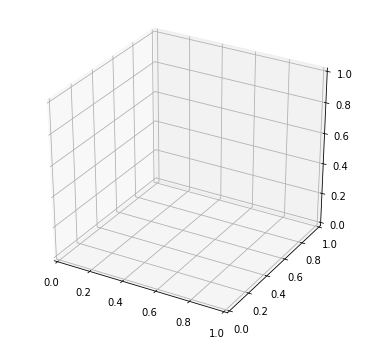

In [104]:
fig = plt.figure(figsize=(14,6))

# `ax` is a 3D-aware axis instance because of the projection='3d' keyword argument to add_subplot
ax = fig.add_subplot(1, 2, 1, projection='3d')

p = ax.plot_surface(df['C'], df['gamma'], df['Accuracy'], rstride=4, cstride=4, linewidth=0)

In [88]:
param_grid = {'C' : [0.1, 1, 10, 100, 1000], 'gamma' : [1, 0.1, 0.01, 0.001, 0.0001]}
for i in range(len(param_grid['C'])):
    print(param_grid['C'][i], param_grid['gamma'][i])

0.1 1
1 0.1
10 0.01
100 0.001
1000 0.0001


In [15]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

In [21]:
from sklearn.svm import SVC
model = SVC(C = 0.1, gamma = 1, kernel = 'rbf')
model.fit(X,y)

SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [22]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = model,X = X,y = y, cv = 10)
print(accuracies.mean())

0.901076937591396


In [23]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = model,X = X,y = y, cv = 50)
print(accuracies.mean())

0.8918163054695561


In [24]:
accuracies


array([0.89473684, 0.83333333, 0.88888889, 0.83333333, 0.83333333,
       0.88888889, 0.94444444, 0.94444444, 0.88235294, 0.88235294,
       0.82352941, 0.76470588, 0.76470588, 0.94117647, 0.88235294,
       0.88235294, 0.88235294, 0.88235294, 0.94117647, 0.94117647,
       0.94117647, 1.        , 0.94117647, 0.82352941, 0.88235294,
       0.94117647, 0.94117647, 0.76470588, 0.82352941, 0.94117647,
       0.82352941, 0.82352941, 0.88235294, 1.        , 0.94117647,
       0.94117647, 0.94117647, 1.        , 1.        , 0.88235294,
       1.        , 0.94117647, 0.88235294, 0.94117647, 0.94117647,
       0.94117647, 0.82352941, 0.82352941, 0.58823529, 0.94117647])

In [27]:
a = df.describe()

In [28]:
type(a)

pandas.core.frame.DataFrame

In [30]:
a.to_csv('database/data analytics.csv')

In [31]:
a

,Perimeter,Eccentricity,Extent,Solidity,BLue,Green,Red,Point Polygon Test
count,859.000000,859.000000,859.000000,859.000000,859.000000,859.000000,859.000000,859.000000
mean,428.676787,0.556179,0.690815,0.937294,41.316647,68.774156,80.824214,15.420994
std,77.368514,0.180694,0.066763,0.052056,7.795154,11.629888,13.803755,6.895215
min,192.994948,0.099212,0.422204,0.687714,22.000000,37.000000,43.000000,-33.526109
25%,369.969080,0.414316,0.649106,0.922400,36.000000,61.000000,72.000000,11.313708
50%,440.374670,0.533433,0.712892,0.958263,41.000000,69.000000,81.000000,15.556349
75%,478.951835,0.714095,0.741136,0.972766,47.000000,77.000000,91.000000,19.798990
max,790.163555,0.928730,0.803072,0.985956,69.000000,104.000000,121.000000,31.000000


In [42]:
df[df['Type'] == 'pearl_millet'].describe()

,Perimeter,Eccentricity,Extent,Solidity,BLue,Green,Red,Point Polygon Test
count,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000
mean,384.641494,0.704495,0.638599,0.900828,39.693267,63.538653,73.037406,17.342133
std,87.087106,0.128328,0.060377,0.056004,7.770983,11.443082,12.717158,8.486596
min,192.994948,0.216157,0.422204,0.687714,22.000000,37.000000,43.000000,-33.526109
25%,328.149276,0.641951,0.604403,0.871933,34.000000,56.000000,63.000000,12.083046
50%,365.362478,0.724610,0.643062,0.919975,39.000000,64.000000,73.000000,19.091883
75%,417.445739,0.797674,0.678571,0.941416,45.000000,71.000000,81.000000,24.020824
max,790.163555,0.928730,0.769015,0.972670,68.000000,100.000000,112.000000,31.000000


In [44]:
import seaborn as sns

In [53]:
x = df.mean()

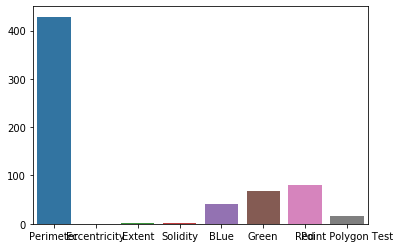

In [58]:
sns.barplot(y = x, x = ['Perimeter', 'Eccentricity', 'Extent', 'Solidity', 'BLue',
       'Green', 'Red', 'Point Polygon Test'])

In [55]:
type(X)

numpy.ndarray

In [60]:
df.groupby('Type').mean()

,Perimeter,Eccentricity,Extent,Solidity,BLue,Green,Red,Point Polygon Test
Type,,,,,,,,
pearl_millet,384.641494,0.704495,0.638599,0.900828,39.693267,63.538653,73.037406,17.342133
sorghum,467.231705,0.426321,0.736533,0.969220,42.737991,73.358079,87.641921,13.738948


In [108]:
grid.best_params_

{'C': 1000, 'gamma': 0.0001}

In [23]:
df = pd.read_csv('database/dataset_pearl_millet.csv')
df

,Type,Contour Id,Perimeter,Eccentricity,Extent,Solidity,BLue,Green,Red,Point Polygon Test
0,pearl_millet,1,371.261973,0.811473,0.575482,0.917934,29,53,63,27.018512
1,pearl_millet,2,374.776692,0.627291,0.662619,0.919970,38,61,70,7.615773
2,pearl_millet,3,248.793937,0.654478,0.645270,0.897918,41,67,76,17.000000
3,pearl_millet,4,309.078207,0.561009,0.715638,0.939831,29,59,81,30.016662
4,pearl_millet,5,358.676186,0.797674,0.604485,0.930461,28,46,58,7.211103
...,...,...,...,...,...,...,...,...,...,...
396,pearl_millet,397,462.558436,0.809408,0.562698,0.847136,32,50,63,18.027756
397,pearl_millet,398,343.948265,0.748260,0.675495,0.952450,34,62,74,15.556349
398,pearl_millet,399,339.119838,0.561291,0.713496,0.936165,39,67,79,25.079872
399,pearl_millet,400,390.374671,0.790726,0.634481,0.900188,46,69,74,2.828427


In [3]:
from numpy.random import uniform

In [6]:
uniform(9, 10)

9.26724811998745

In [7]:
df

,Type,Contour Id,Perimeter,Eccentricity,Extent,Solidity,BLue,Green,Red,Point Polygon Test
0,pearl_millet,1,371.261973,0.811473,0.575482,0.917934,29,53,63,27.018512
1,pearl_millet,2,374.776692,0.627291,0.662619,0.919970,38,61,70,7.615773
2,pearl_millet,3,248.793937,0.654478,0.645270,0.897918,41,67,76,17.000000
3,pearl_millet,4,309.078207,0.561009,0.715638,0.939831,29,59,81,30.016662
4,pearl_millet,5,358.676186,0.797674,0.604485,0.930461,28,46,58,7.211103
...,...,...,...,...,...,...,...,...,...,...
396,pearl_millet,397,462.558436,0.809408,0.562698,0.847136,32,50,63,18.027756
397,pearl_millet,398,343.948265,0.748260,0.675495,0.952450,34,62,74,15.556349
398,pearl_millet,399,339.119838,0.561291,0.713496,0.936165,39,67,79,25.079872
399,pearl_millet,400,390.374671,0.790726,0.634481,0.900188,46,69,74,2.828427


In [8]:
uniform(df['Perimeter'].min(), df['Perimeter'].max())

313.04247298680605

In [11]:
df.columns

Index(['Type', 'Contour Id', 'Perimeter', 'Eccentricity', 'Extent', 'Solidity',
       'BLue', 'Green', 'Red', 'Point Polygon Test'],
      dtype='object')

In [12]:
keys = ['Perimeter', 'Eccentricity', 'Extent', 'Solidity', 'BLue', 'Green', 'Red', 'Point Polygon Test']

In [15]:
df[keys[0]].min()

192.99494767189026

In [17]:
df.loc[len(df)] = np.nan

In [21]:
df.loc[401]['Perimeter'] = 104

/home/jerry/anaconda3/envs/tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [24]:
df

,Type,Contour Id,Perimeter,Eccentricity,Extent,Solidity,BLue,Green,Red,Point Polygon Test
0,pearl_millet,1,371.261973,0.811473,0.575482,0.917934,29,53,63,27.018512
1,pearl_millet,2,374.776692,0.627291,0.662619,0.919970,38,61,70,7.615773
2,pearl_millet,3,248.793937,0.654478,0.645270,0.897918,41,67,76,17.000000
3,pearl_millet,4,309.078207,0.561009,0.715638,0.939831,29,59,81,30.016662
4,pearl_millet,5,358.676186,0.797674,0.604485,0.930461,28,46,58,7.211103
...,...,...,...,...,...,...,...,...,...,...
396,pearl_millet,397,462.558436,0.809408,0.562698,0.847136,32,50,63,18.027756
397,pearl_millet,398,343.948265,0.748260,0.675495,0.952450,34,62,74,15.556349
398,pearl_millet,399,339.119838,0.561291,0.713496,0.936165,39,67,79,25.079872
399,pearl_millet,400,390.374671,0.790726,0.634481,0.900188,46,69,74,2.828427


In [26]:
i = 401
a = []
for i in keys :
    a.append(uniform(df[i].min(),df[i].max()))
a
# df.loc[len(df)] = ['pearl_millet', i, uniform

[516.4768063477152,
 0.4749248608008312,
 0.6168217736386272,
 0.9034485622928877,
 46.74281103308613,
 74.02069376110083,
 67.62166616854076,
 -10.607932432258057]